In [1]:
import matplotlib.pyplot as plt
import models 
import numpy as np

%matplotlib widget

Solved in 3 iterations, number of nodes 33143. 
Maximum relative residual: 1.04e-04 
Maximum boundary residual: 1.93e-28


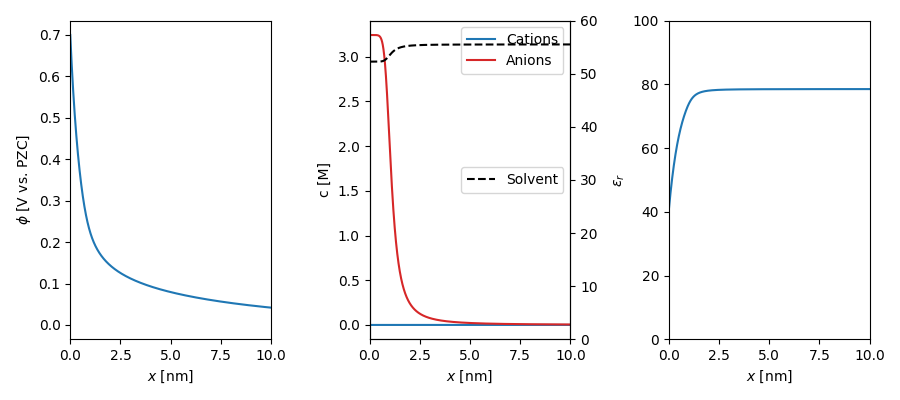

In [2]:
pzc_V = 0
concentration_M = 1e-3
huang = models.Huang(concentration_M, pzc_V, 8e-10, 8e-10, model_water_molecules=True)
huang_df = huang.getProfileDataframe(100e-9, 10000, 0.7, force_recalculation=True)

plt.close()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,4), sharex=True)
ax[0].plot(huang_df['x [nm]'], huang_df['Potential [V]'], label='Huang')
ax[0].set_xlabel(r'$x$ [nm]')
ax[0].set_ylabel(r'$\phi$ [V vs. PZC]')
ax[0].set_xlim([0, 10])

ax[1].plot(huang_df['x [nm]'], huang_df['Cation conc. [M]'], '-', color='tab:blue', label='Cations')
ax[1].plot(huang_df['x [nm]'], huang_df['Anion conc. [M]'], '-', color='tab:red', label='Anions')
waterax = ax[1].twinx()
waterax.plot(huang_df['x [nm]'], huang_df['Solvent conc. [M]'], '--', color='k', label='Solvent')
waterax.set_ylim([0, 60])
waterax.legend(loc='right')
ax[1].legend(loc='upper right')
ax[1].set_ylabel('c [M]')
ax[1].set_xlabel(r'$x$ [nm]')

ax[2].plot(huang_df['x [nm]'], huang_df['Rel. permittivity'])
ax[2].set_ylim([0, 100])
ax[2].set_ylabel(r'$\varepsilon_r$')
ax[2].set_xlabel(r'$x$ [nm]')
plt.tight_layout()

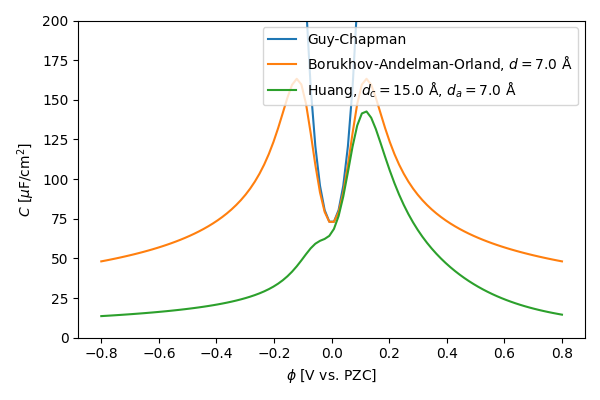

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

pzc_V = 0
concentration_M = 1e-1
force=True

gc = models.GuyChapman(concentration_M, pzc_V)
bao = models.BorukhovAndelmanOrland(concentration_M, pzc_V, 7e-10)
huang = models.Huang(concentration_M, pzc_V, 15e-10, 7e-10, model_water_molecules=True)

phi = np.linspace(pzc_V-0.8, pzc_V+0.8, 100) 

ax.plot(phi, gc.getCapacitance_uFcm2(phi), label='Guy-Chapman')
ax.plot(phi, bao.getCapacitance_uFcm2(phi), label=rf'Borukhov-Andelman-Orland, $d=${bao.a*1e10:.1f} Å')
ax.plot(phi, huang.getCapacitance_uFcm2(phi, force_recalculation=force), label=rf'Huang, $d_c=${huang.dc*1e10:.1f} Å, $d_a=${huang.da*1e10:.1f} Å')
ax.set_ylim([0, 200])
ax.set_xlabel(r'$\phi$ [V vs. PZC]')
ax.set_ylabel(r'$C$ [$\mu$F/cm$^2$]')
ax.legend() 

plt.tight_layout()